<a href="https://colab.research.google.com/github/Dansah2/Free_Code_Camp_Tutorials/blob/main/Pytorch_NeuralNets_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons

# make 1000 samples
n_samples = 1000

X, y = make_moons(n_samples,
                  noise=0.02,
                  random_state=42)

In [2]:
# view the first five X and y values
X[:5], y[:5]

(array([[-0.00331218,  0.38337854],
        [ 0.94351058, -0.48147221],
        [ 0.92575899, -0.44953496],
        [ 0.43047045, -0.3660583 ],
        [-0.84701745,  0.52790514]]),
 array([1, 1, 1, 1, 0]))

In [3]:
# make a dataframe of the data
import pandas as pd
moons = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'label': y})

moons.head(15)

,X1,X2,label
0,-0.003312,0.383379,1
1,0.943511,-0.481472,1
2,0.925759,-0.449535,1
3,0.430470,-0.366058,1
4,-0.847017,0.527905,0
5,0.574662,-0.368780,1
6,0.296083,-0.210375,1
7,-0.008543,0.430013,1
8,1.629695,-0.278017,1
9,0.666163,0.776073,0


In [4]:
# count the number of each label
moons.label.value_counts()

1    500
0    500
Name: label, dtype: int64

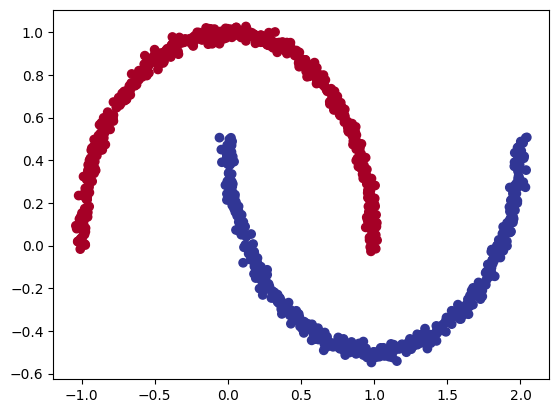

In [5]:
# plot the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [6]:
# check the shape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# convert data to tensors
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# view the first five samples
X[:5], y[:5]

(tensor([[-0.0033,  0.3834],
         [ 0.9435, -0.4815],
         [ 0.9258, -0.4495],
         [ 0.4305, -0.3661],
         [-0.8470,  0.5279]]),
 tensor([1., 1., 1., 1., 0.]))

In [8]:
# split data into test/train after you have converted to tensors
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [9]:
# check the lengths of the training and testing data
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [10]:
import torch
from torch import nn

# device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [11]:
# build model with non-linear activation functions
class MoonsModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=15)
    self.layer_2 = nn.Linear(in_features=15, out_features=15)
    self.layer_3 = nn.Linear(in_features=15, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    # put RelU activation between layers
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model = MoonsModel().to(device)
model

MoonsModel(
  (layer_1): Linear(in_features=2, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
)

In [12]:
# create loss function
loss_fn = nn.BCEWithLogitsLoss()

# create the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)



In [13]:
# calculate the accuracy
!pip install --upgrade torchmetrics
from torchmetrics import Accuracy

accuracy_fn = Accuracy(task='multiclass', num_classes=2).to(device)
accuracy_fn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 10.7 MB/s eta 0:00:00


MulticlassAccuracy()

In [14]:
# train non-linear model
torch.manual_seed(42)
epochs = 1000

# put the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  # put model in training mode
  model.train()

  # forward pass
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss and the accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_pred, y_train.int())

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()

  # put model in testing mode
  model.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    #calculate the loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(test_preds, y_test.int())

    # print out what is happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69837, Accuracy: 0.50% | Test Loss: 0.69743, Test Accuracy: 0.50%
Epoch: 10 | Loss: 0.67435, Accuracy: 0.50% | Test Loss: 0.67597, Test Accuracy: 0.50%
Epoch: 20 | Loss: 0.64492, Accuracy: 0.50% | Test Loss: 0.64914, Test Accuracy: 0.50%
Epoch: 30 | Loss: 0.60580, Accuracy: 0.73% | Test Loss: 0.61345, Test Accuracy: 0.71%
Epoch: 40 | Loss: 0.55722, Accuracy: 0.79% | Test Loss: 0.56925, Test Accuracy: 0.76%
Epoch: 50 | Loss: 0.50308, Accuracy: 0.79% | Test Loss: 0.51948, Test Accuracy: 0.76%
Epoch: 60 | Loss: 0.44848, Accuracy: 0.80% | Test Loss: 0.46803, Test Accuracy: 0.80%
Epoch: 70 | Loss: 0.40308, Accuracy: 0.81% | Test Loss: 0.42435, Test Accuracy: 0.82%
Epoch: 80 | Loss: 0.36671, Accuracy: 0.82% | Test Loss: 0.38737, Test Accuracy: 0.83%
Epoch: 90 | Loss: 0.33764, Accuracy: 0.83% | Test Loss: 0.35649, Test Accuracy: 0.84%
Epoch: 100 | Loss: 0.31459, Accuracy: 0.84% | Test Loss: 0.33095, Test Accuracy: 0.85%
Epoch: 110 | Loss: 0.29593, Accuracy: 0.86% | Test Los

In [15]:
# make predictions
model.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()

y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

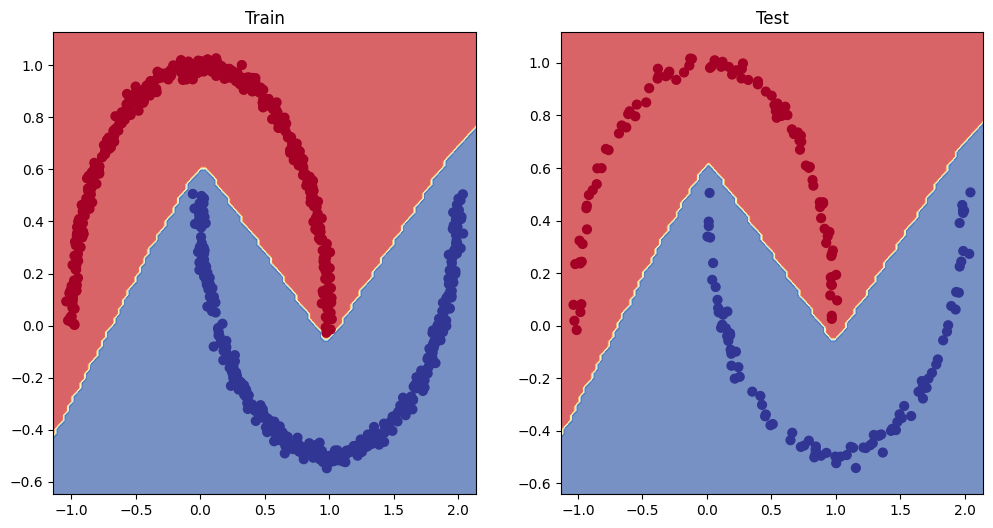

In [17]:
# plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

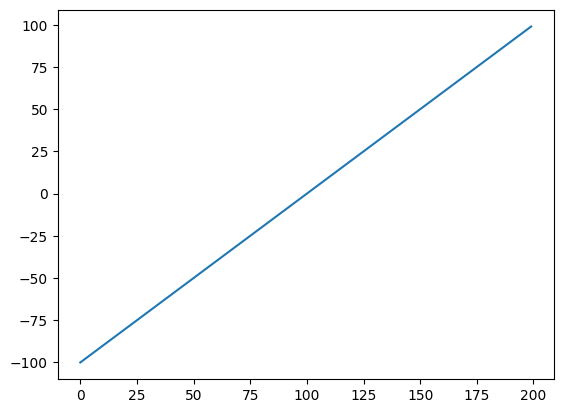

In [18]:
# replicate Tanh (hyperbolic tangent)

tensor_A = torch.arange(-100, 100, 1)
plt.plot(tensor_A);

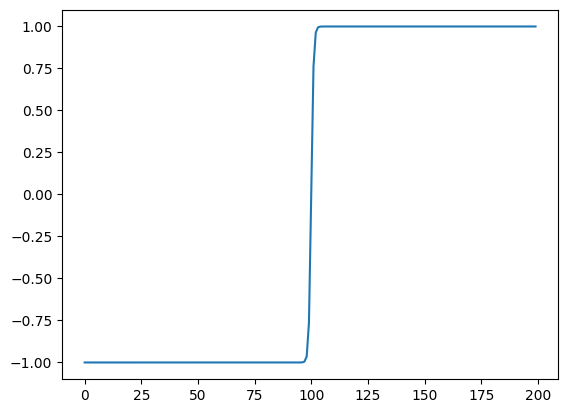

In [19]:
plt.plot(torch.tanh(tensor_A));

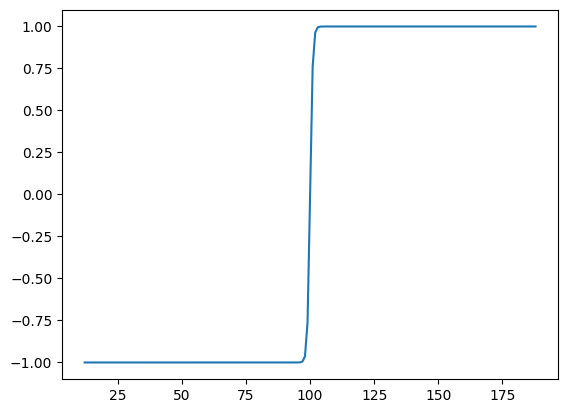

In [20]:
def tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(tanh(tensor_A))

Multi-Class Classification

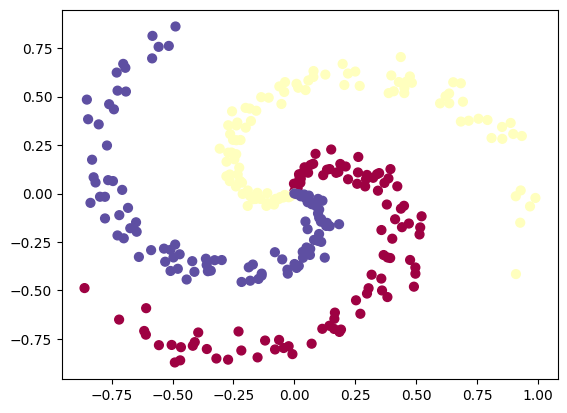

In [21]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [22]:
# check to see the type of the data
X.dtype, y.dtype

(dtype('float64'), dtype('uint8'))

In [58]:
# convert y to LongTensor type
y = y.type(torch.LongTensor)
y.dtype

torch.int64

In [59]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [60]:
# device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [61]:
# build model to handle multi class classification
from torch import nn

class SpiralModel(nn.Module):
  def __init__(self, inputs, outputs, hidden=8):
    """
    Args:
    inputs (int) number of input features
    outputs (int) number of outputs
    hidden (int) hidden units between layers, default 8
    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=inputs, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=outputs)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# create an instance of the model and add it to the device
model_1 = SpiralModel(inputs=D,
                      outputs=K,
                      hidden=10).to(device)
model_1

SpiralModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [70]:
# set the model and data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


In [63]:
# create a loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.1)

In [64]:
# perform a single forward pass to check if it works
model_1(X_train)[:5]

tensor([[-0.1693,  0.2031,  0.3370],
        [-0.1615,  0.1827,  0.3267],
        [-0.1729,  0.2402,  0.3745],
        [-0.0930,  0.1856,  0.4210],
        [-0.1027,  0.2141,  0.4399]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [65]:
model_1(X_train)[0].shape, K

(torch.Size([3]), 3)

In [66]:
# logits -> prediction probs -> prediction labels

# make prediction logits with the model
y_logits = model_1(X_train)

#perform softmax to get prediction probs
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.1693,  0.2031,  0.3370],
        [-0.1615,  0.1827,  0.3267],
        [-0.1729,  0.2402,  0.3745],
        [-0.0930,  0.1856,  0.4210],
        [-0.1027,  0.2141,  0.4399]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.2433, 0.3531, 0.4036],
        [0.2475, 0.3492, 0.4033],
        [0.2358, 0.3565, 0.4077],
        [0.2504, 0.3309, 0.4187],
        [0.2443, 0.3354, 0.4203]], device='cuda:0', grad_fn=<SliceBackward0>)


In [67]:
# each individual sample add up to 1, sum the first sample to check
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

In [68]:
# check with class the model is predicting using argmax
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.2433, 0.3531, 0.4036], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(2, device='cuda:0')


In [72]:
accuracy_fn = Accuracy(task='multiclass', num_classes=3).to(device)

In [73]:
# set manual seed
torch.manual_seed(42)

# set epochs
epochs = 100

# Training
for epoch in range(epochs):
  model_1.train()

  # forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model_1(X_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # calculate the loss
    loss = loss_fn(test_logits, y_test)
    acc = accuracy_fn(test_preds, y_test)

    # print out what is happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.06793, Acc: 0.37% | Test Loss: 0.02342, Test Acc: 1.00%
Epoch: 10 | Loss: 0.56200, Acc: 0.68% | Test Loss: 0.02342, Test Acc: 1.00%
Epoch: 20 | Loss: 0.26526, Acc: 0.93% | Test Loss: 0.02342, Test Acc: 1.00%
Epoch: 30 | Loss: 0.12054, Acc: 0.93% | Test Loss: 0.02342, Test Acc: 1.00%
Epoch: 40 | Loss: 0.08690, Acc: 0.95% | Test Loss: 0.02342, Test Acc: 1.00%
Epoch: 50 | Loss: 0.03053, Acc: 1.00% | Test Loss: 0.02342, Test Acc: 1.00%
Epoch: 60 | Loss: 0.01420, Acc: 1.00% | Test Loss: 0.02342, Test Acc: 1.00%
Epoch: 70 | Loss: 0.00783, Acc: 1.00% | Test Loss: 0.02342, Test Acc: 1.00%
Epoch: 80 | Loss: 0.00483, Acc: 1.00% | Test Loss: 0.02342, Test Acc: 1.00%
Epoch: 90 | Loss: 0.00372, Acc: 1.00% | Test Loss: 0.02342, Test Acc: 1.00%


In [76]:
# make predictions
model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_test)

  # view the first 10 predictions
y_logits[:10]

tensor([[ -1.7243,  -3.7570,   2.6060],
        [-16.8148,   3.1231,   9.6037],
        [-10.0387,  11.6744, -11.0467],
        [  3.5779,  -2.5836,  -5.2202],
        [ -0.3359,  -9.0031,   8.7050],
        [ -2.4435,  -8.7195,  10.0248],
        [ 18.4169,  30.8758, -47.9137],
        [ -3.8252,   3.8260,  -5.2981],
        [  1.9130,  -0.8294,  -5.5720],
        [ 34.6251,  38.8592, -83.1416]], device='cuda:0')

In [78]:
# convert logits -> predictions probabilities -> prediction labels
y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

# compare first 10 model preds and test labels
print(f'Predictions: {y_preds[:10]}\nLabels: {y_test[:10]}')
print(f"Test Accuracy: {accuracy_fn(y_preds, y_test)}%")

Predictions: tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1], device='cuda:0')
Labels: tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1], device='cuda:0')
Test Accuracy: 1.0%


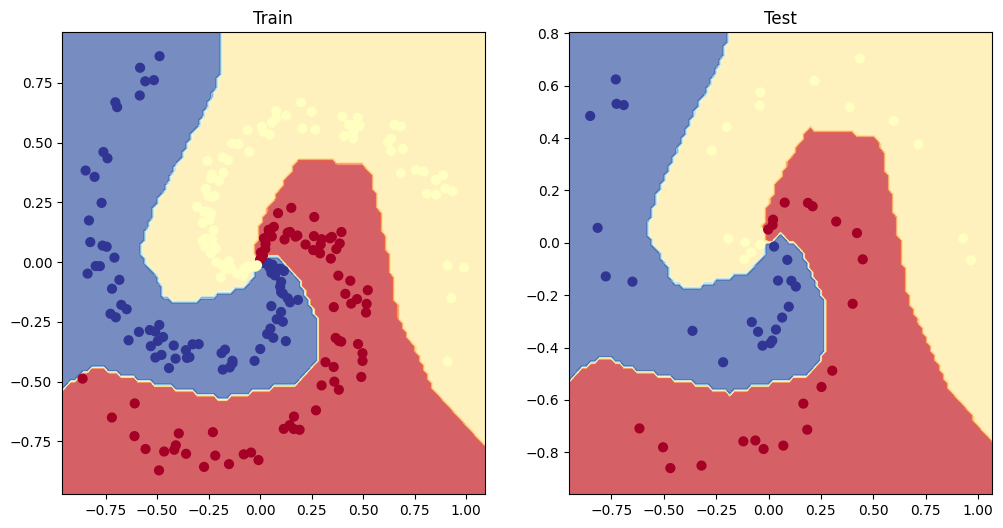

In [79]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)
